In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

print(tf.__version__)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

2024-03-12 00:54:13.319500: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.13.0


In [2]:
# funciones que nos van a ayudar

# normaliza un conjunto de datos
def norm(x, st):
    return((x - st['mean'])/st['std'])

# un plot de la historia del ajuste
# def plot_history(history):
#   hist = pd.DataFrame(history.history)
#   hist['epoch'] = history.epoch

#   plt.figure()
#   plt.xlabel('Epoch')
#   plt.ylabel('Mean Square Error')
#   plt.plot(hist['epoch'], hist['mse'],'r--',
#            label='Training Error')
#   plt.plot(hist['epoch'], hist['val_mse'],'b',
#            label = 'Validation Error')
#   plt.ylim([0,20])
#   plt.legend()
#   plt.show() # un €


def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['loss'],'r--',
           label='Training Error')
  # plt.plot(hist['epoch'], hist['mse'],'b',
  #          label = 'mse')
  #plt.ylim([0,20])
  plt.legend()
  plt.show() # un €

In [5]:
# url = 'https://raw.githubusercontent.com/mcstllns/DeepLearning/main/Datos%20AF%20final.csv'
url = 'https://raw.githubusercontent.com/mcstllns/DeepLearning/main/datos%20para%20P07/Datos%20AF%20final.csv'
df = pd.read_csv(url)

In [6]:
print(df.shape)
# print(df.head())
# print(df.columns)

(269, 68)


In [7]:
# X = df.iloc[:,np.r_[2:12, df.columns.get_loc("A2")]]
X = df.iloc[:,np.r_[df.columns.get_loc("A01.10"):df.columns.get_loc("S04.14")+1, df.columns.get_loc("A2")]]
X = X.dropna()


# Esta parte separa en train y test, pero en nuestro caso no tiene sentido 
# porque el objetivo es descriptivo, no predictivo

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X.iloc[:,0:50], X.iloc[:,50], test_size=0.20)

x = X.iloc[:,0:50]
y = X.iloc[:,50]




In [8]:
x_stats = x.describe().transpose()
y_stats = y.describe().transpose()

x_norm = norm(x, x_stats)
y_norm = norm(y, y_stats)

In [9]:
print(x_norm.shape)
print(y_norm.shape)


(143, 50)
(143,)


In [10]:
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape=[( len(x.keys()) )]))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.summary()

model.compile(loss='mse',
              optimizer = Adam(learning_rate = 0.001),
              metrics = ['mse','mae'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3264      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11649 (45.50 KB)
Trainable params: 11649 (45.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
history = model.fit(x_norm, y,
                    epochs = 500,
                    batch_size = 25,
                    verbose = 0) # para evitar que se llene toda la pantalla

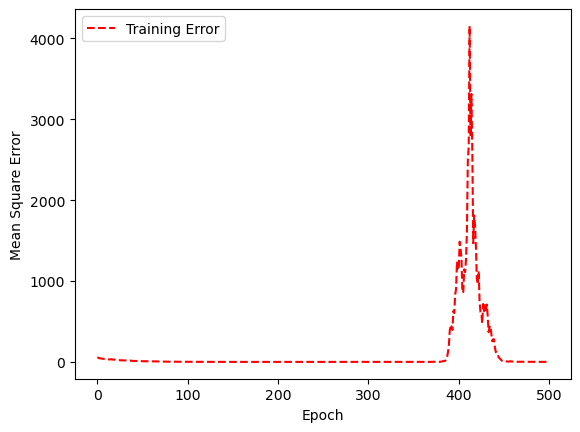

In [13]:
plot_history(history)

In [14]:
model.evaluate(x_norm, y)

5/5 [==============================] - 0s 2ms/step - loss: 0.9752 - mse: 0.9752 - mae: 0.7399


[0.9751620888710022, 0.9751620888710022, 0.7399111390113831]

5/5 [==============================] - 0s 1ms/step


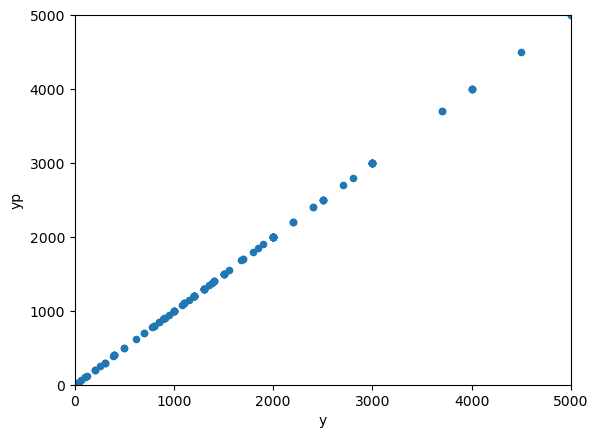

In [15]:
# Como las variables son cuantitativas un grafico de dispersion podría estar perfecto

yp = model.predict(x_norm)


df = pd.DataFrame({'y': y, 'yp': yp.flatten()})
df.plot.scatter(x='y', y='yp')
plt.xlim([0,5000])
plt.ylim([0,5000])
plt.show()